In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams


rcParams['figure.figsize'] = 10, 10 # set figure size
example = pd.DataFrame({
    'x': range(0, 100, 2),
    'y': range(0, 100, 2),
    'wrong1': [i*1.5 for i in range(0, 100, 2) ],
    'wrong2': [i*0.25 for i in range(0, 100, 2) ]
})

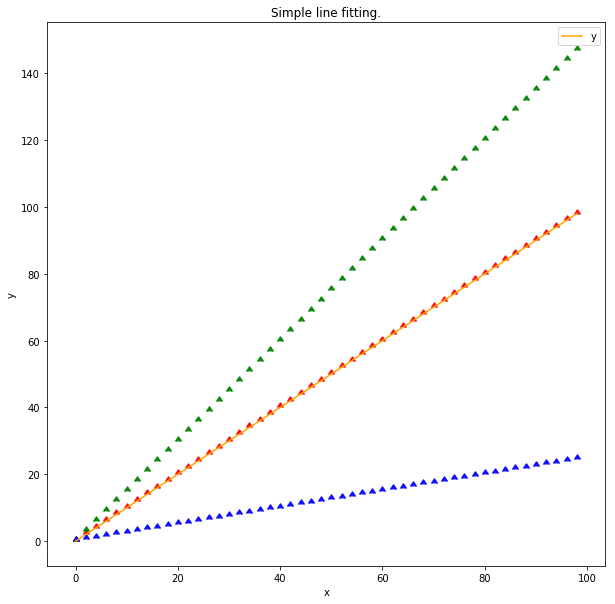

In [3]:
example.plot(x='x', y='y', color='orange')
plt.scatter(example['x'], example['y'], marker=10, alpha=0.9, color='r')
plt.scatter(example['x'], example['wrong1'], marker=10, alpha=0.9, color='g')
plt.scatter(example['x'], example['wrong2'], marker=10, alpha=0.9, color='b')
plt.ylabel('y')
plt.title('Simple line fitting.')
plt.show()

### Plot of Error with slope

/home/subigya/.pyenv/versions/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: numpy.arange
  """


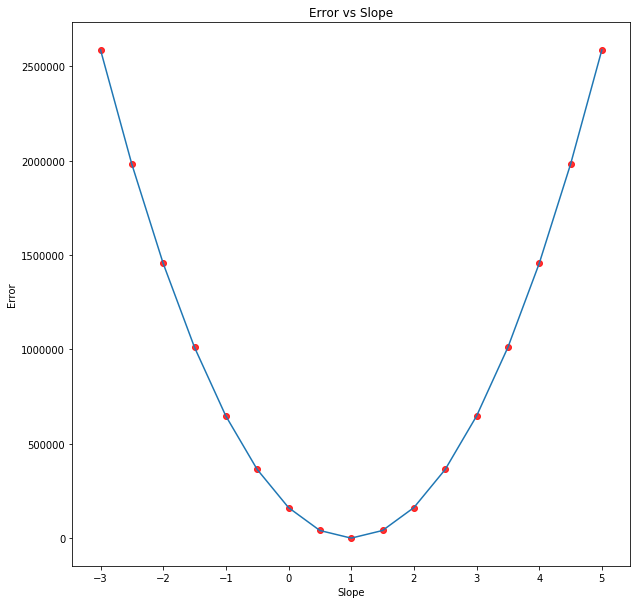

In [4]:
from matplotlib.mlab import frange
import numpy as np


slopes = frange(-3.0, 5.0, 0.5)
errors = []
for s in slopes:
    line_points = np.array([i*s for i in range(0, 100, 2)])
    errors.append(np.sum(np.square(example['y'].values - line_points)))
    
plt.plot(slopes, errors, label='Error')
plt.scatter(slopes, errors, color='r', alpha=0.8, )
plt.xlabel('Slope')
plt.ylabel('Error')
plt.title('Error vs Slope')
plt.show()

### Let's generate a normal distribution of data



In [5]:

ran = np.arange(10, 5010, 100)
delta = np.random.uniform(-5,5, size=(50,))
s = np.sqrt(ran) + delta
# print(s)


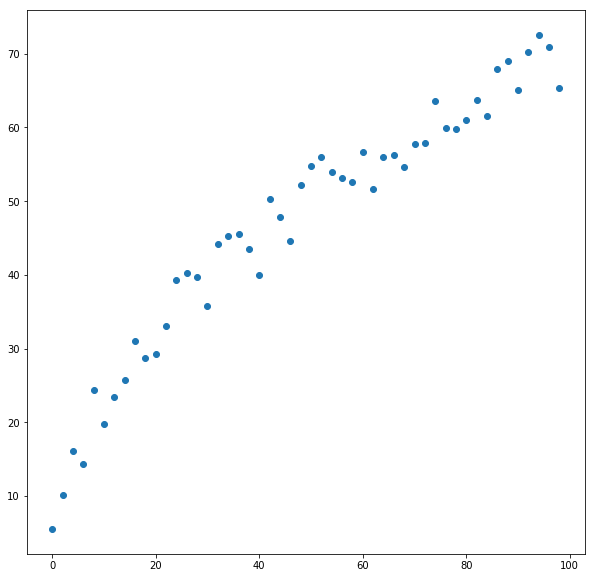

In [6]:
# print(example['x'].values.shape, s.shape)
xx = example['x'].values
plt.scatter(xx, s)
plt.show()

## Let's fit curve using different methods

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split

lr = LinearRegression()
rd = Ridge(alpha=1)
la = Lasso(alpha=1)

In [8]:

# print(xx)
x1 = xx[:, np.newaxis]
x2 = np.sqrt(xx[:, np.newaxis])
# print(x1.shape, x2.shape)
# print(x1, x2)
xxx = np.concatenate((x1, x2), axis=1)
# print('xxd', xxx)
yy = s
print(xxx.shape, yy.shape)

(50, 2) (50,)


In [9]:

xtrain, xtest, ytrain, ytest = train_test_split(xxx, yy, random_state=14)
xtrainplot, xtestplot, ytrainplot, ytestplot = train_test_split(xx, yy, random_state=14) # only for plotting

def fit_all(xt, yt):
    lr.fit(xt, yt)
    rd.fit(xt, yt)
    la.fit(xt, yt)
    return lr, rd, la

fit_all(xtrain, ytrain)

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False))

#### Plot the different regression models

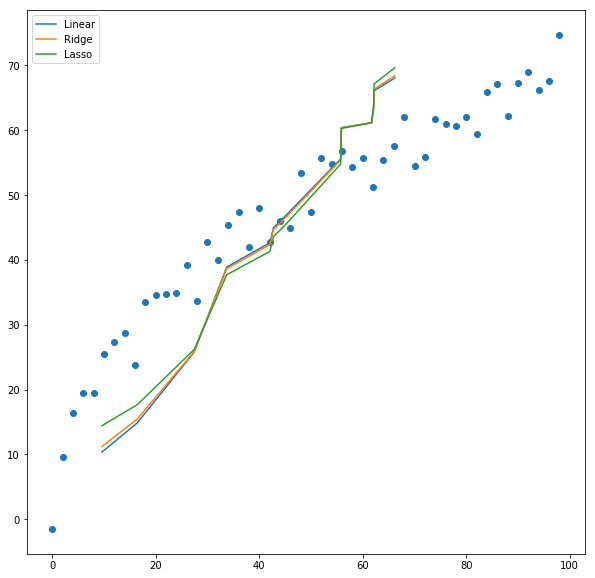

In [77]:
def plot_all(lr, rd, la, xtrain, ytrain, xtest, xtestplot):
    train_plot = plt.scatter(xtrain, ytrain) 
    # test_plot = plt.scatter(xtest, ytest)
    lrplot_points = lr.predict(xtest)
    rdplot_points = rd.predict(xtest)
    laplot_points = la.predict(xtest)
    plt.plot(np.sort(xtestplot), np.sort(lr.predict(xtest)), label="Linear")
    plt.plot(np.sort(xtestplot), np.sort(rd.predict(xtest)), label="Ridge")
    plt.plot(np.sort(xtestplot), np.sort(la.predict(xtest)), label="Lasso")
    plt.legend(loc='best')
    # plt.ylim((-50, 50))
    plt.show()

plot_all(lr, rd, la, xx, yy, xtest, ytest)